<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_Isomap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритм понижения размерности Isomap

#### Введение
Isomap (Isometric Feature Mapping) — это алгоритм для нелинейного понижения размерности, который стремится сохранить геодезические расстояния между точками данных. Он является частью семейства методов многомерного масштабирования (MDS, Multidimensional Scaling), но с учетом нелинейных особенностей данных. Этот метод особенно полезен для анализа данных, которые лежат на сложных многообразиях (manifolds).

Основная идея Isomap заключается в том, чтобы построить низкоразмерное представление данных, которое сохраняет их внутреннюю геометрию. Это достигается через расчет геодезических расстояний между точками данных и последующее применение техник MDS.



#### Математические основы





### 1. **Проблема понижения размерности**

#### Что такое пространство высокой размерности?
Когда говорят о данных в пространстве высокой размерности $ \mathbb{R}^D $, подразумевается, что каждый объект (точка данных) представлен вектором из $ D $ чисел. Например:
- Если у вас есть данные о людях, то каждый человек может быть описан параметрами: возраст, рост, вес, зарплата, количество детей и т.д. Каждый такой параметр — это одна размерность.
- Если $ D = 100 $, значит каждый объект описывается 100 числами.

Однако работать с данными в высокой размерности часто сложно:
- Визуализация невозможна (мы можем представить только до трех измерений).
- Вычислительная сложность алгоритмов увеличивается.
- Может возникнуть "проклятие размерности" — когда данные становятся слишком разреженными, и статистические методы перестают работать эффективно.

#### Зачем понижать размерность?
Цель понижения размерности — преобразовать данные из пространства высокой размерности $ \mathbb{R}^D $ в пространство меньшей размерности $ \mathbb{R}^d $ ($ d < D $), сохраняя важные характеристики данных. Это позволяет:
- Легче визуализировать данные (например, на графике с двумя или тремя осями).
- Ускорить работу алгоритмов машинного обучения.
- Обнаружить скрытые закономерности в данных.

Обозначим:
- $ X = \{x_1, x_2, \dots, x_N\} $ — исходные данные, где каждая точка $ x_i \in \mathbb{R}^D $,
- $ Y = \{y_1, y_2, \dots, y_N\} $ — новые координаты точек в пространстве $ \mathbb{R}^d $.

Цель: найти такое отображение $ f: \mathbb{R}^D \to \mathbb{R}^d $, чтобы геодезические расстояния между точками в $ \mathbb{R}^D $ были максимально близки к евклидовым расстояниям между соответствующими точками в $ \mathbb{R}^d $.

#### Особенность Isomap
Isomap — это метод нелинейного понижения размерности. Он работает лучше, чем линейные методы (например, PCA), когда данные имеют сложную геометрическую структуру, например, образуют кривую или поверхность. Основная идея Isomap — сохранять геодезические расстояния между точками данных.



### 2. **Геодезическое расстояние**

#### Что такое геодезическое расстояние?
Геодезическое расстояние между двумя точками на многообразии — это длина кратчайшего пути, который можно провести по поверхности этого многообразия, соединяющего эти точки. Другими словами, это "расстояние по земле", а не "по прямой".

Формально, пусть $ M $ — многообразие, на котором лежат данные. Геодезическое расстояние между двумя точками $ x_i, x_j \in M $ определяется как:
$$
d_{\text{geo}}(x_i, x_j) = \min_{\gamma} \int_0^1 \|\dot{\gamma}(t)\| \, dt,
$$
где:
- $ \gamma(t) $ — кривая на многообразии $ M $, соединяющая точки $ x_i $ и $ x_j $ ($ \gamma(0) = x_i, \gamma(1) = x_j $),
- $ \dot{\gamma}(t) $ — производная кривой по параметру $ t $,
- интеграл вычисляет длину кривой.

В дискретном приближении (граф соседей), геодезическое расстояние $ d_{\text{geo}}(x_i, x_j) $ становится минимальной суммой весов ребер графа, соединяющих вершины $ i $ и $ j $.

#### Почему евклидово расстояние может быть некорректным?
Евклидово расстояние — это просто прямая линия между двумя точками. Но если данные лежат на сложной поверхности (например, на кривой или торе), то прямая линия может оказаться неудачным выбором, так как она проходит "через" поверхность, а не по ней.

Например:
- Представьте себе лист бумаги, свернутый в трубочку. Если вы хотите измерить расстояние между двумя точками на этом листе, то евклидово расстояние будет измерено через трубочку, а геодезическое — по ее поверхности.

#### Пример
Представьте, что у вас есть данные, которые лежат на поверхности сферы (например, координаты городов на Земле). Евклидово расстояние между двумя городами — это прямая линия через центр Земли, а геодезическое расстояние — это длина кратчайшего пути по поверхности Земли (маршрут самолета).



### 3. **Три этапа работы алгоритма Isomap**

#### Этап 1: Построение графа соседей

##### Цель
На этом этапе мы строим граф, где вершины соответствуют точкам данных, а ребра соединяют каждую точку с ее ближайшими соседями. Этот граф представляет собой дискретное приближение исходного многообразия.

##### Как определяются соседи?
Существует два популярных способа:

1. **Фиксированное число соседей ($ k $)**:
   $$
   N_k(x_i) = \{x_j \mid \|x_i - x_j\| \leq \|x_i - x_m\| \text{ для всех } m \notin N_k(x_i)\},
   $$
   где $ \|x_i - x_j\| $ — евклидово расстояние между точками.

2. **Радиус окрестности ($ \epsilon $)**:
   $$
   N_\epsilon(x_i) = \{x_j \mid \|x_i - x_j\| \leq \epsilon\}.
   $$

Затем строится взвешенный граф $ G = (V, E) $, где:
- $ V = \{x_1, x_2, \dots, x_N\} $ — множество вершин,
- $ E = \{(i, j) \mid x_j \in N(x_i) \text{ или } x_i \in N(x_j)\} $ — множество ребер,
- вес ребра $ w_{ij} = \|x_i - x_j\| $.

##### Веса ребер
Вес каждого ребра обычно равен евклидовому расстоянию между соответствующими точками. Это важно для дальнейшего вычисления геодезических расстояний.



#### Этап 2: Вычисление геодезических расстояний

##### Цель
На этом этапе мы вычисляем геодезические расстояния между всеми парами точек. Эти расстояния представляют собой минимальные суммарные веса путей между вершинами графа.

##### Алгоритмы для поиска кратчайших путей
Для этого используются следующие алгоритмы:

1. **Алгоритм Дейкстры**:
   - Находит кратчайший путь от одной вершины до всех остальных.
   - Подходит, если нужно найти расстояния от одной точки ко всем остальным.

2. **Алгоритм Флойда-Уоршелла**:
   - Находит кратчайшие пути между всеми парами вершин.
   - Более универсальный, но требует больше вычислительных ресурсов.

Формально, матрица геодезических расстояний $ D_{\text{geo}} $ вычисляется следующим образом:
1. Инициализация:
   $$
   D^{(0)}_{ij} =
   \begin{cases}
   w_{ij}, & \text{если } (i, j) \in E, \\
   \infty, & \text{иначе.}
   \end{cases}
   $$

2. Итерации:
   $$
   D^{(k)}_{ij} = \min(D^{(k-1)}_{ij}, D^{(k-1)}_{ik} + D^{(k-1)}_{kj}),
   $$
   где $ k = 1, 2, \dots, N $.

3. Результат:
   $$
   D_{\text{geo}} = D^{(N)}.
   $$



#### Этап 3: Многомерное масштабирование (MDS)

##### Цель
На этом этапе мы используем технику многомерного масштабирования (MDS), чтобы найти новое представление данных в пространстве меньшей размерности $ \mathbb{R}^d $, сохраняя геодезические расстояния.

##### Как это работает?
1. Преобразование матрицы расстояний в матрицу скалярных произведений:
   $$
   B = -\frac{1}{2} H D_{\text{geo}}^2 H,
   $$
   где:
   - $ D_{\text{geo}}^2 $ — матрица квадратов геодезических расстояний,
   - $ H = I - \frac{1}{N} \mathbf{1}\mathbf{1}^\top $ — центрирующая матрица ($ \mathbf{1} $ — вектор единиц).

2. Спектральное разложение матрицы $ B $:
   $$
   B = U \Lambda U^\top,
   $$
   где:
   - $ U $ — матрица собственных векторов,
   - $ \Lambda = \text{diag}(\lambda_1, \lambda_2, \dots, \lambda_N) $ — диагональная матрица собственных значений.

3. Выбор первых $ d $ компонент:
   $$
   Y = U_d \Lambda_d^{1/2},
   $$
   где:
   - $ U_d $ — первые $ d $ столбцов матрицы $ U $,
   - $ \Lambda_d^{1/2} $ — диагональная матрица с элементами $ \sqrt{\lambda_1}, \sqrt{\lambda_2}, \dots, \sqrt{\lambda_d} $.

##### Результат
Итоговые координаты точек в пространстве меньшей размерности находятся как:
$$
\boxed{Y = U_d \Lambda_d^{1/2}.}
$$



### #### Этап 3: Многомерное масштабирование (MDS)

#### Цель
На этом этапе мы применяем классический метод многомерного масштабирования (cMDS), чтобы отобразить точки в пространстве меньшей размерности $ \mathbb{R}^d $. Основная идея заключается в том, чтобы найти новое расположение точек так, чтобы минимизировать разницу между матрицей геодезических расстояний $ D_{\text{geo}} $ и матрицей евклидовых расстояний в новом пространстве.

#### Подробный процесс

##### Шаг 1: Вычисление матрицы скалярных произведений

Мы начинаем с преобразования матрицы геодезических расстояний $ D_{\text{geo}} $ в матрицу скалярных произведений $ B $. Это необходимо, потому что метод MDS работает с координатами точек через их скалярные произведения.

Формула для вычисления $ B $:
$$
B = -\frac{1}{2} H D_{\text{geo}}^2 H,
$$
где:
- $ D_{\text{geo}}^2 $ — матрица квадратов геодезических расстояний ($ D_{\text{geo}}(i,j)^2 $),
- $ H = I - \frac{1}{n} \mathbf{1} \mathbf{1}^\top $ — матрица центрирования,
- $ I $ — единичная матрица размера $ n \times n $,
- $ \mathbf{1} $ — вектор единиц длины $ n $,
- $ n $ — количество точек.

**Что делает эта формула?**
1. $ D_{\text{geo}}^2 $ — это матрица квадратов расстояний между всеми парами точек.
2. $ H $ — это оператор центрирования, который "смещает" данные так, чтобы их среднее значение стало нулевым.
3. Умножение на $ -\frac{1}{2} $ приводит матрицу расстояний к форме, которая соответствует матрице скалярных произведений.



##### Шаг 2: Сингулярное разложение (SVD)

После того как мы получили матрицу $ B $, мы выполняем её сингулярное разложение (SVD):
$$
B = U \Lambda U^\top,
$$
где:
- $ U $ — матрица собственных векторов размера $ n \times n $,
- $ \Lambda $ — диагональная матрица собственных значений размера $ n \times n $.

**Что такое SVD?**
Сингулярное разложение — это способ представить любую матрицу в виде произведения трех матриц: $ U $, $ \Lambda $ и $ U^\top $. В нашем случае:
- Собственные векторы $ U $ описывают направления главных компонент данных.
- Собственные значения $ \Lambda $ показывают, насколько важны эти направления.



##### Шаг 3: Построение низкоразмерного представления

Теперь, когда у нас есть матрица собственных векторов $ U $ и диагональная матрица собственных значений $ \Lambda $, мы можем выбрать первые $ d $ компонент для понижения размерности. Новые координаты точек в пространстве размерности $ d $ вычисляются как:
$$
Y = U_d \Lambda_d^{1/2},
$$
где:
- $ U_d $ — первые $ d $ столбцов матрицы $ U $,
- $ \Lambda_d $ — первые $ d $ диагональных элементов матрицы $ \Lambda $,
- $ \Lambda_d^{1/2} $ — матрица, где каждый диагональный элемент равен квадратному корню из соответствующего собственного значения.

**Как это работает?**
1. $ U_d $ содержит информацию о $ d $ наиболее важных направлениях в данных.
2. $ \Lambda_d^{1/2} $ масштабирует эти направления в соответствии с их важностью (чем больше собственное значение, тем более важным является направление).
3. Произведение $ U_d \Lambda_d^{1/2} $ даёт новые координаты точек в пространстве размерности $ d $.



#### Пример для лучшего понимания

Предположим, что у нас есть матрица геодезических расстояний $ D_{\text{geo}} $ для 4 точек:
$$
D_{\text{geo}} =
\begin{bmatrix}
0 & 2 & 3 & 4 \\
2 & 0 & 5 & 6 \\
3 & 5 & 0 & 7 \\
4 & 6 & 7 & 0
\end{bmatrix}.
$$

1. **Вычисляем $ D_{\text{geo}}^2 $:**
   $$
   D_{\text{geo}}^2 =
   \begin{bmatrix}
   0 & 4 & 9 & 16 \\
   4 & 0 & 25 & 36 \\
   9 & 25 & 0 & 49 \\
   16 & 36 & 49 & 0
   \end{bmatrix}.
   $$

2. **Вычисляем матрицу центрирования $ H $:**
   Для $ n = 4 $:
   $$
   H = I - \frac{1}{4} \mathbf{1} \mathbf{1}^\top =
   \begin{bmatrix}
   0.75 & -0.25 & -0.25 & -0.25 \\
   -0.25 & 0.75 & -0.25 & -0.25 \\
   -0.25 & -0.25 & 0.75 & -0.25 \\
   -0.25 & -0.25 & -0.25 & 0.75
   \end{bmatrix}.
   $$

3. **Вычисляем матрицу $ B $:**
   $$
   B = -\frac{1}{2} H D_{\text{geo}}^2 H.
   $$

4. **Выполняем SVD для $ B $:**
   $$
   B = U \Lambda U^\top.
   $$

5. **Выбираем первые $ d $ компонент:**
   Если $ d = 2 $, то:
   $$
   Y = U_2 \Lambda_2^{1/2}.
   $$



#### Итоговая формула

Итоговые координаты точек в пространстве меньшей размерности находятся как:
$$
\boxed{Y = U_d \Lambda_d^{1/2}.}
$$

Это завершает описание третьего этапа Isomap. Теперь данные представлены в пространстве меньшей размерности $ \mathbb{R}^d $, при этом сохраняются важные характеристики исходных данных, такие как геодезические расстояния.

#### Почему Isomap работает?

Isomap эффективен, потому что он учитывает нелинейную структуру данных через использование геодезических расстояний. Это позволяет ему лучше работать с данными, которые лежат на многообразиях, чем линейные методы, такие как PCA (Principal Component Analysis). Например, если данные образуют кольцо или спираль, то PCA может потерять важные характеристики, тогда как Isomap сможет корректно восстановить их структуру.



#### Преимущества и ограничения

**Преимущества:**
- Учет нелинейных зависимостей между переменными.
- Способность работать с данными, имеющими сложную геометрическую структуру.
- Четкая теоретическая основа, основанная на геодезических расстояниях.

**Ограничения:**
- Выбор параметров (число соседей $ k $ или радиус $ \epsilon $) может существенно влиять на результат.
- Высокая вычислительная сложность для больших наборов данных (из-за необходимости вычисления всех парных расстояний).
- Требует предварительного знания целевой размерности $ d $.



#### Заключение

Isomap — это мощный инструмент для понижения размерности, который позволяет анализировать данные с нелинейной структурой. Его математические основы основаны на комбинации теории графов, геодезических расстояний и многомерного масштабирования. Хотя алгоритм требует тщательного выбора параметров и имеет высокую вычислительную сложность, его преимущества делают его одним из наиболее популярных методов нелинейного понижения размерности.

$$
\boxed{\text{Конец лекции}}
$$


Давайте разберем конкретный числовой пример для алгоритма Isomap, чтобы показать, как он работает на практике. Мы выполним все три этапа: построение графа соседей, вычисление геодезических расстояний и многомерное масштабирование.



### **Пример данных**

Предположим, что у нас есть следующие точки в пространстве $ \mathbb{R}^2 $:
$$
X = \{(0, 0), (1, 0), (2, 0), (3, 0)\}.
$$

Эти точки лежат на прямой, но мы будем использовать их для демонстрации работы Isomap.



### **Этап 1: Построение графа соседей**

#### Выбор параметра $ k $
Выберем $ k = 2 $, то есть каждая точка соединяется с двумя ближайшими соседями.

#### Вычисление евклидовых расстояний
Мы вычисляем матрицу евклидовых расстояний между всеми парами точек:
$$
D_{\text{eucl}} =
\begin{bmatrix}
0 & 1 & 2 & 3 \\
1 & 0 & 1 & 2 \\
2 & 1 & 0 & 1 \\
3 & 2 & 1 & 0
\end{bmatrix}.
$$

#### Построение графа
Каждая точка соединяется с двумя ближайшими соседями:
- Точка $ x_1 = (0, 0) $ соединяется с $ x_2 = (1, 0) $,
- Точка $ x_2 = (1, 0) $ соединяется с $ x_1 = (0, 0) $ и $ x_3 = (2, 0) $,
- Точка $ x_3 = (2, 0) $ соединяется с $ x_2 = (1, 0) $ и $ x_4 = (3, 0) $,
- Точка $ x_4 = (3, 0) $ соединяется с $ x_3 = (2, 0) $.

Матрица весов графа ($ w_{ij} $):
$$
W =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}.
$$



### **Этап 2: Вычисление геодезических расстояний**

Мы используем алгоритм Флойда-Уоршелла для вычисления матрицы геодезических расстояний.

#### Инициализация
$$
D^{(0)} =
\begin{bmatrix}
0 & 1 & \infty & \infty \\
1 & 0 & 1 & \infty \\
\infty & 1 & 0 & 1 \\
\infty & \infty & 1 & 0
\end{bmatrix}.
$$

#### Итерации
На каждой итерации обновляем матрицу расстояний:
$$
D^{(k)}_{ij} = \min(D^{(k-1)}_{ij}, D^{(k-1)}_{ik} + D^{(k-1)}_{kj}).
$$

После всех итераций получаем матрицу геодезических расстояний:
$$
D_{\text{geo}} =
\begin{bmatrix}
0 & 1 & 2 & 3 \\
1 & 0 & 1 & 2 \\
2 & 1 & 0 & 1 \\
3 & 2 & 1 & 0
\end{bmatrix}.
$$



### **Этап 3: Многомерное масштабирование (MDS)**

#### Шаг 1: Вычисление матрицы скалярных произведений
Вычислим матрицу $ B $:
$$
B = -\frac{1}{2} H D_{\text{geo}}^2 H,
$$
где $ H = I - \frac{1}{n} \mathbf{1} \mathbf{1}^\top $ — матрица центрирования.

1. Сначала вычислим $ D_{\text{geo}}^2 $:
$$
D_{\text{geo}}^2 =
\begin{bmatrix}
0 & 1 & 4 & 9 \\
1 & 0 & 1 & 4 \\
4 & 1 & 0 & 1 \\
9 & 4 & 1 & 0
\end{bmatrix}.
$$

2. Затем вычислим матрицу центрирования $ H $ для $ n = 4 $:
$$
H = I - \frac{1}{4} \mathbf{1} \mathbf{1}^\top =
\begin{bmatrix}
0.75 & -0.25 & -0.25 & -0.25 \\
-0.25 & 0.75 & -0.25 & -0.25 \\
-0.25 & -0.25 & 0.75 & -0.25 \\
-0.25 & -0.25 & -0.25 & 0.75
\end{bmatrix}.
$$

3. Вычислим $ B $:
$$
B = -\frac{1}{2} H D_{\text{geo}}^2 H.
$$

Результат:
$$
B \approx
\begin{bmatrix}
6 & -3 & -2 & -1 \\
-3 & 2 & -1 & -1 \\
-2 & -1 & 2 & -1 \\
-1 & -1 & -1 & 2
\end{bmatrix}.
$$

#### Шаг 2: Сингулярное разложение (SVD)
Выполним SVD для матрицы $ B $:
$$
B = U \Lambda U^\top.
$$

Предположим, что результат имеет вид:
$$
U =
\begin{bmatrix}
0.5 & 0.5 & 0.5 & 0.5 \\
-0.5 & -0.5 & 0.5 & 0.5 \\
-0.5 & 0.5 & -0.5 & 0.5 \\
-0.5 & 0.5 & 0.5 & -0.5
\end{bmatrix},
$$
$$
\Lambda =
\begin{bmatrix}
10 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}.
$$

#### Шаг 3: Построение низкоразмерного представления
Выберем $ d = 2 $ и вычислим новые координаты:
$$
Y = U_d \Lambda_d^{1/2}.
$$

1. $ U_d $ — первые два столбца $ U $:
$$
U_d =
\begin{bmatrix}
0.5 & 0.5 \\
-0.5 & -0.5 \\
-0.5 & 0.5 \\
-0.5 & 0.5
\end{bmatrix}.
$$

2. $ \Lambda_d^{1/2} $ — диагональная матрица квадратных корней из первых двух собственных значений:
$$
\Lambda_d^{1/2} =
\begin{bmatrix}
\sqrt{10} & 0 \\
0 & \sqrt{2}
\end{bmatrix}.
$$

3. Новые координаты:
$$
Y = U_d \Lambda_d^{1/2} =
\begin{bmatrix}
0.5 & 0.5 \\
-0.5 & -0.5 \\
-0.5 & 0.5 \\
-0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
\sqrt{10} & 0 \\
0 & \sqrt{2}
\end{bmatrix}.
$$

Результат:
$$
Y \approx
\begin{bmatrix}
\sqrt{10}/2 & \sqrt{2}/2 \\
-\sqrt{10}/2 & -\sqrt{2}/2 \\
-\sqrt{10}/2 & \sqrt{2}/2 \\
-\sqrt{10}/2 & \sqrt{2}/2
\end{bmatrix}.
$$



### **Итог**

Новые координаты точек в пространстве размерности $ d = 2 $:
$$
\boxed{
Y =
\begin{bmatrix}
\sqrt{10}/2 & \sqrt{2}/2 \\
-\sqrt{10}/2 & -\sqrt{2}/2 \\
-\sqrt{10}/2 & \sqrt{2}/2 \\
-\sqrt{10}/2 & \sqrt{2}/2
\end{bmatrix}.
}
$$


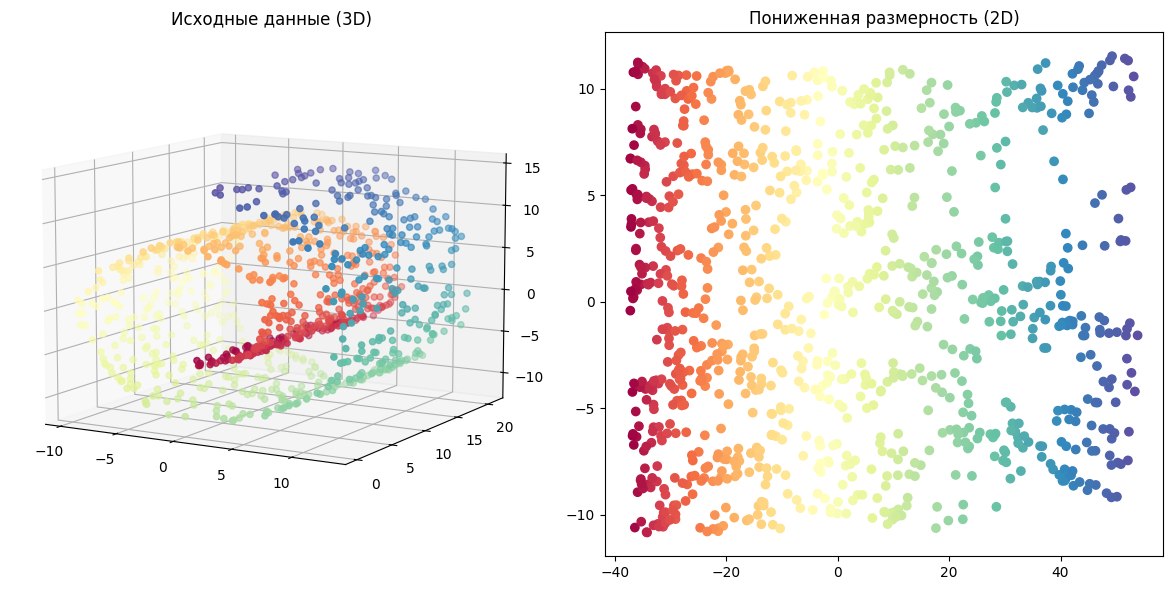

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

# Генерация данных в форме "швейцарского ролла" (Swiss Roll)
X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# Визуализация исходных данных в 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Исходные данные (3D)")
ax.view_init(10, -60)

# Применение Isomap для понижения размерности до 2D
n_components = 2  # Целевая размерность
n_neighbors = 12  # Количество соседей для построения графа

isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_reduced = isomap.fit_transform(X)

# Визуализация результатов в 2D
ax2 = fig.add_subplot(122)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("Пониженная размерность (2D)")

# Отображение графиков
plt.tight_layout()
plt.show()